# qsi-tk

> pip install qsi-tk==0.x.x  # use the lastest version

This package is a master library containing various previous packages published by our team.

<table>
    <tbody>
        <tr>
            <td>module</td>
            <td>sub-module</td>
            <td>description</td>
            <td>standalone pypi package</td>
            <td>publication</td>
        </tr>
        <tr>
            <td colspan = 1 rowspan = 2>qsi.io</td>
            <td>
            <td>File I/O, Dataset loading</td>
            <td></td>
            <td>TODO qsi-tk open datasets with algorithms</td>
        </tr>
        <tr>
            <td colspan = 1>qsi.io.aug</td>
            <td>Data augmentation, e.g., generative models</td>
            <td></td>
            <td>TODO Data aug with deep generative models. e.g., " variational autoencoders, generative adversarial networks, autoregressive models, normalizing flow models, energy-based models, and score-based models. "</td>
        </tr>
        <tr>
            <td colspan = 2>qsi.vis</td>
            <td>Plotting</td>
        </tr>
        <tr>
            <td colspan = 2>qsi.cs</td>
            <td>compressed sensing</td>
            <td>cs1</td>
            <td>Adaptive compressed sensing of Raman spectroscopic profiling data for discriminative tasks [J]. Talanta, 2020, doi: 10.1016/j.talanta.2019.120681
            <br/>
            Task-adaptive eigenvector-based projection (EBP) transform for compressed sensing: A case study of spectroscopic profiling sensor [J]. Analytical Science Advances. Chemistry Europe, 2021, doi: 10.1002/ansa.202100018
            </td>
        </tr>
        <tr>
            <td colspan = 2>qsi.fs</td>
            <td>feature selection</td>
        </tr>
        <tr>
            <td colspan = 2>qsi.ks</td>
            <td>kernels</td>
            <td>ackl</td>
            <td>TODO</td>
        </tr>
        <tr>
            <td rowspan = 2>qsi.dr</td>
            <td>qsi.dr.metrics</td>
            <td>Dimensionality Reduction (DR) quality metrics</td>
            <td>pyDRMetrics, wDRMetrics</td>
            <td>pyDRMetrics - A Python toolkit for dimensionality reduction quality assessment, Heliyon, Volume 7, Issue 2, 2021, e06199, ISSN 2405-8440, doi: 10.1016/j.heliyon.2021.e06199.</td>
        </tr>
        <tr>
            <td>qsi.dr.mf</td>
            <td>matrix-factorization based DR</td>
            <td>pyMFDR</td>
            <td>Matrix Factorization Based Dimensionality Reduction Algorithms - A Comparative Study on Spectroscopic Profiling Data [J], Analytical Chemistry, 2022. doi: 10.1021/acs.analchem.2c01922</td>
        </tr>
        <tr>
            <td rowspan = 4>qsi.cla</td>
            <td>qsi.cla.metrics</td>
            <td>classifiability analysis</td>
            <td>pyCLAMs, wCLAMs</td>
            <td>A unified classifiability analysis framework based on meta-learner and its application in spectroscopic profiling data [J]. Applied Intelligence, 2021, doi: 10.1007/s10489-021-02810-8
            <br/> 
            pyCLAMs: An integrated Python toolkit for classifiability analysis [J]. SoftwareX, 2022, doi: 10.1016/j.softx.2022.101007</td>
        </tr>
        <tr>
            <td>qsi.cla.ensemble</td>
            <td>homo-stacking, hetero-stacking, FSSE</td>
            <td rowspan = 3>pyNNRW</td>
            <td rowspan = 3>Spectroscopic Profiling-based Geographic Herb Identification by Neural Network with Random Weights [J]. Spectrochimica Acta Part A: Molecular and Biomolecular Spectroscopy, 2022, doi: 10.1016/j.saa.2022.121348</td>
        </tr>
        <tr>
            <td>qsi.cla.kernel</td>
            <td>kernel-NNRW</td>
        </tr>
        <tr>
            <td>qsi.cla.nnrw</td>
            <td>neural networks with random weights</td>
        </tr>
        <tr>
            <td rowspan = 1>qsi.pipeline</td>
            <td></td>
            <td>General data analysis pipelines.</td>
            <td></td>
            <td></td>
        </tr>
    </tbody>
</table>

## qsi.io

In [1]:
import qsi
qsi.__version__

'0.4.2'

# io.load_dataset

load dataset from 7044X_RAMAN.csv
X.shape (160, 2090)  y.shape (160,)


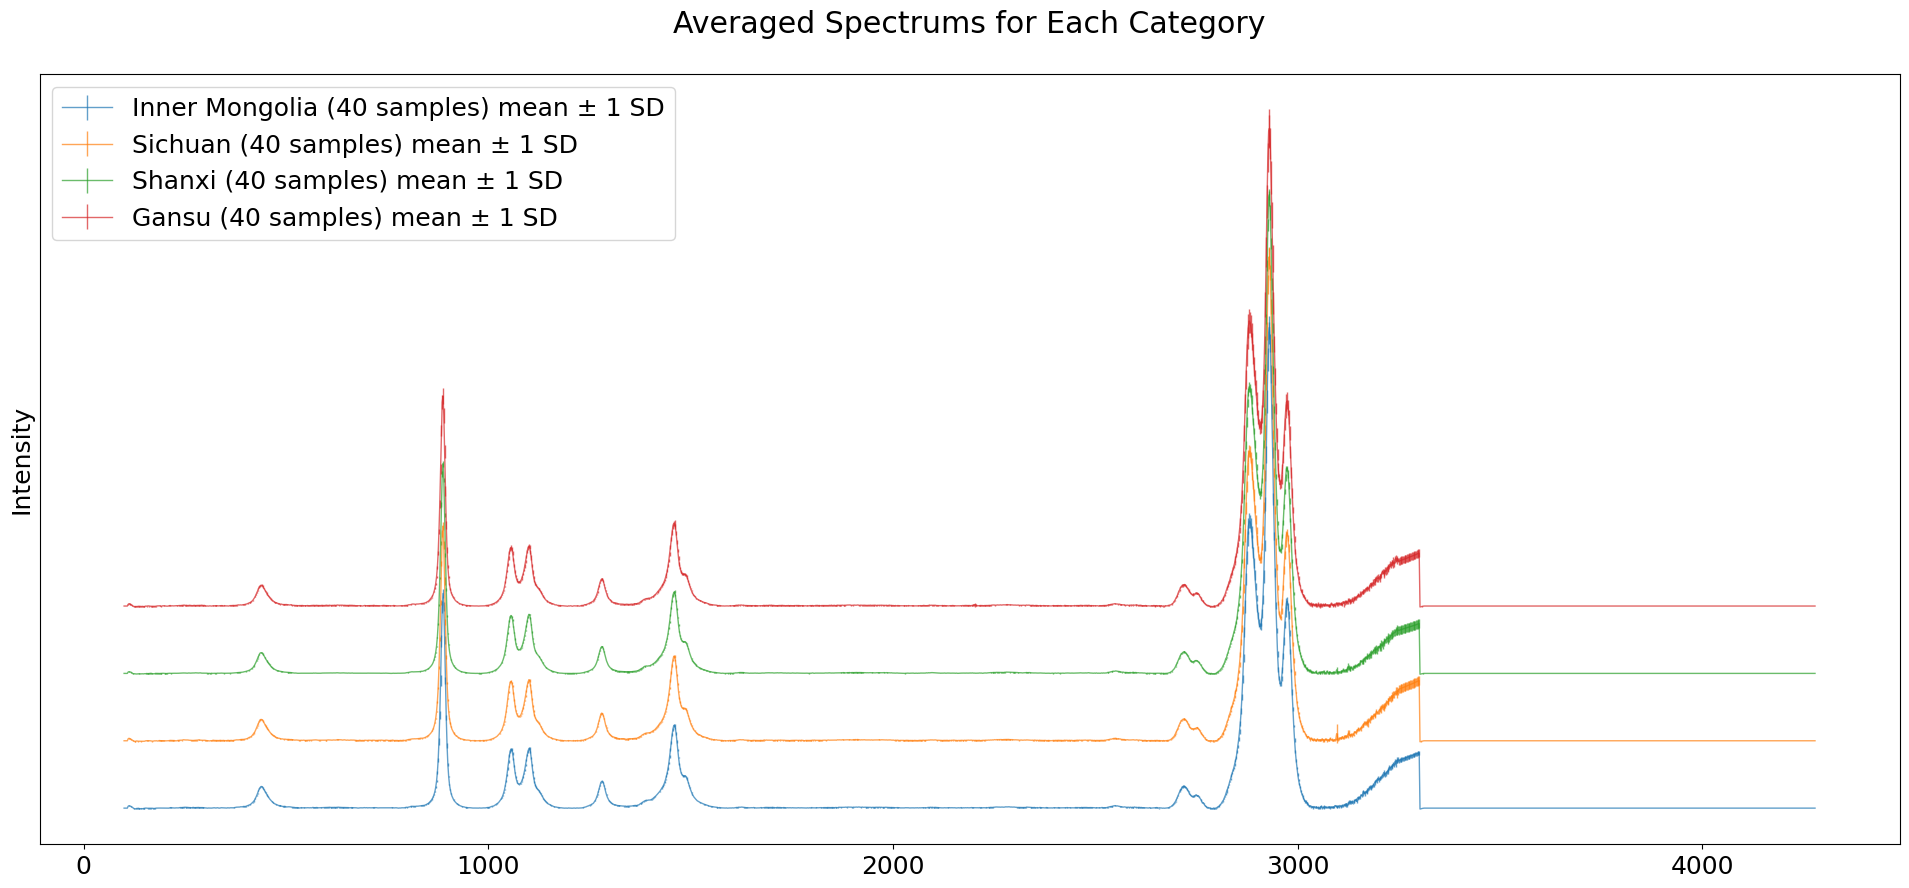

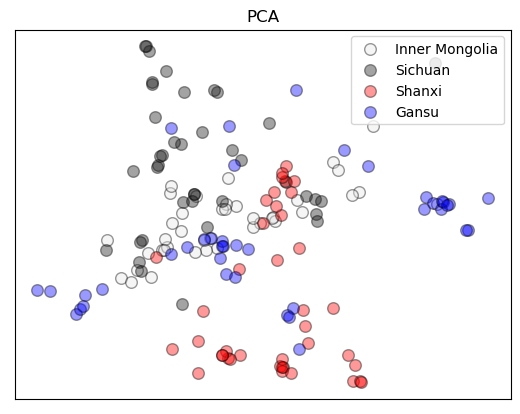

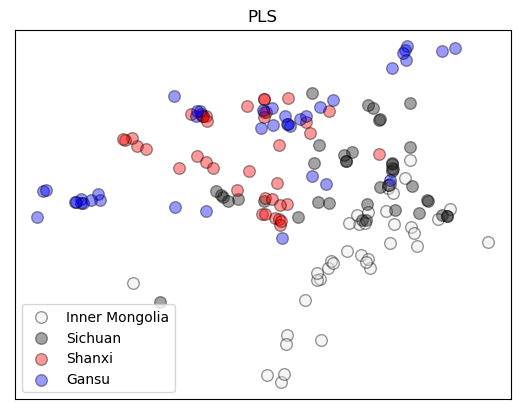

Raman spectra of radix astragali (astragalus root, 黄芪, Huang-qi). 

Raman spectra
  X meaning: Raman shift /wavenumber
  X range: 100 ~ 4278 cm-1
  Dimensions: 2090
  Resolution: 2cm-1 

Radix astragali is a widely used medicinal herb in traditional Chinese medicine (TCM). The major chemical components of radix astragali include polysaccharides, saponins, alkaloids, flavonoids, and various mineral elements. It is often used to treat diabetes and cardiovascular diseases.

All Radix Astragali samples were obtained from Simcere Company Limited (China); the origins of these samples were：

label = 0: Inner Mongolia (North China), 
label = 1: Sichuan (Southwest China), 
label = 2: Shanxi (Northwest China), 
label = 3: Gansu (Northwest China).

Data set summary:

Y labels: ["内蒙黄芪","四川黄芪","山西黄芪","甘肃黄芪"]

Among these regions, Inner Mongolia, Shanxi, and Gansu are traditional daodi regions.

Instrument:
The Raman spectrum of each sample was collected by a portable laser Raman spectrometer Protte

In [2]:
from qsi import io
X, y, X_names, _, labels = io.load_dataset('huangqi_rm', display=True)

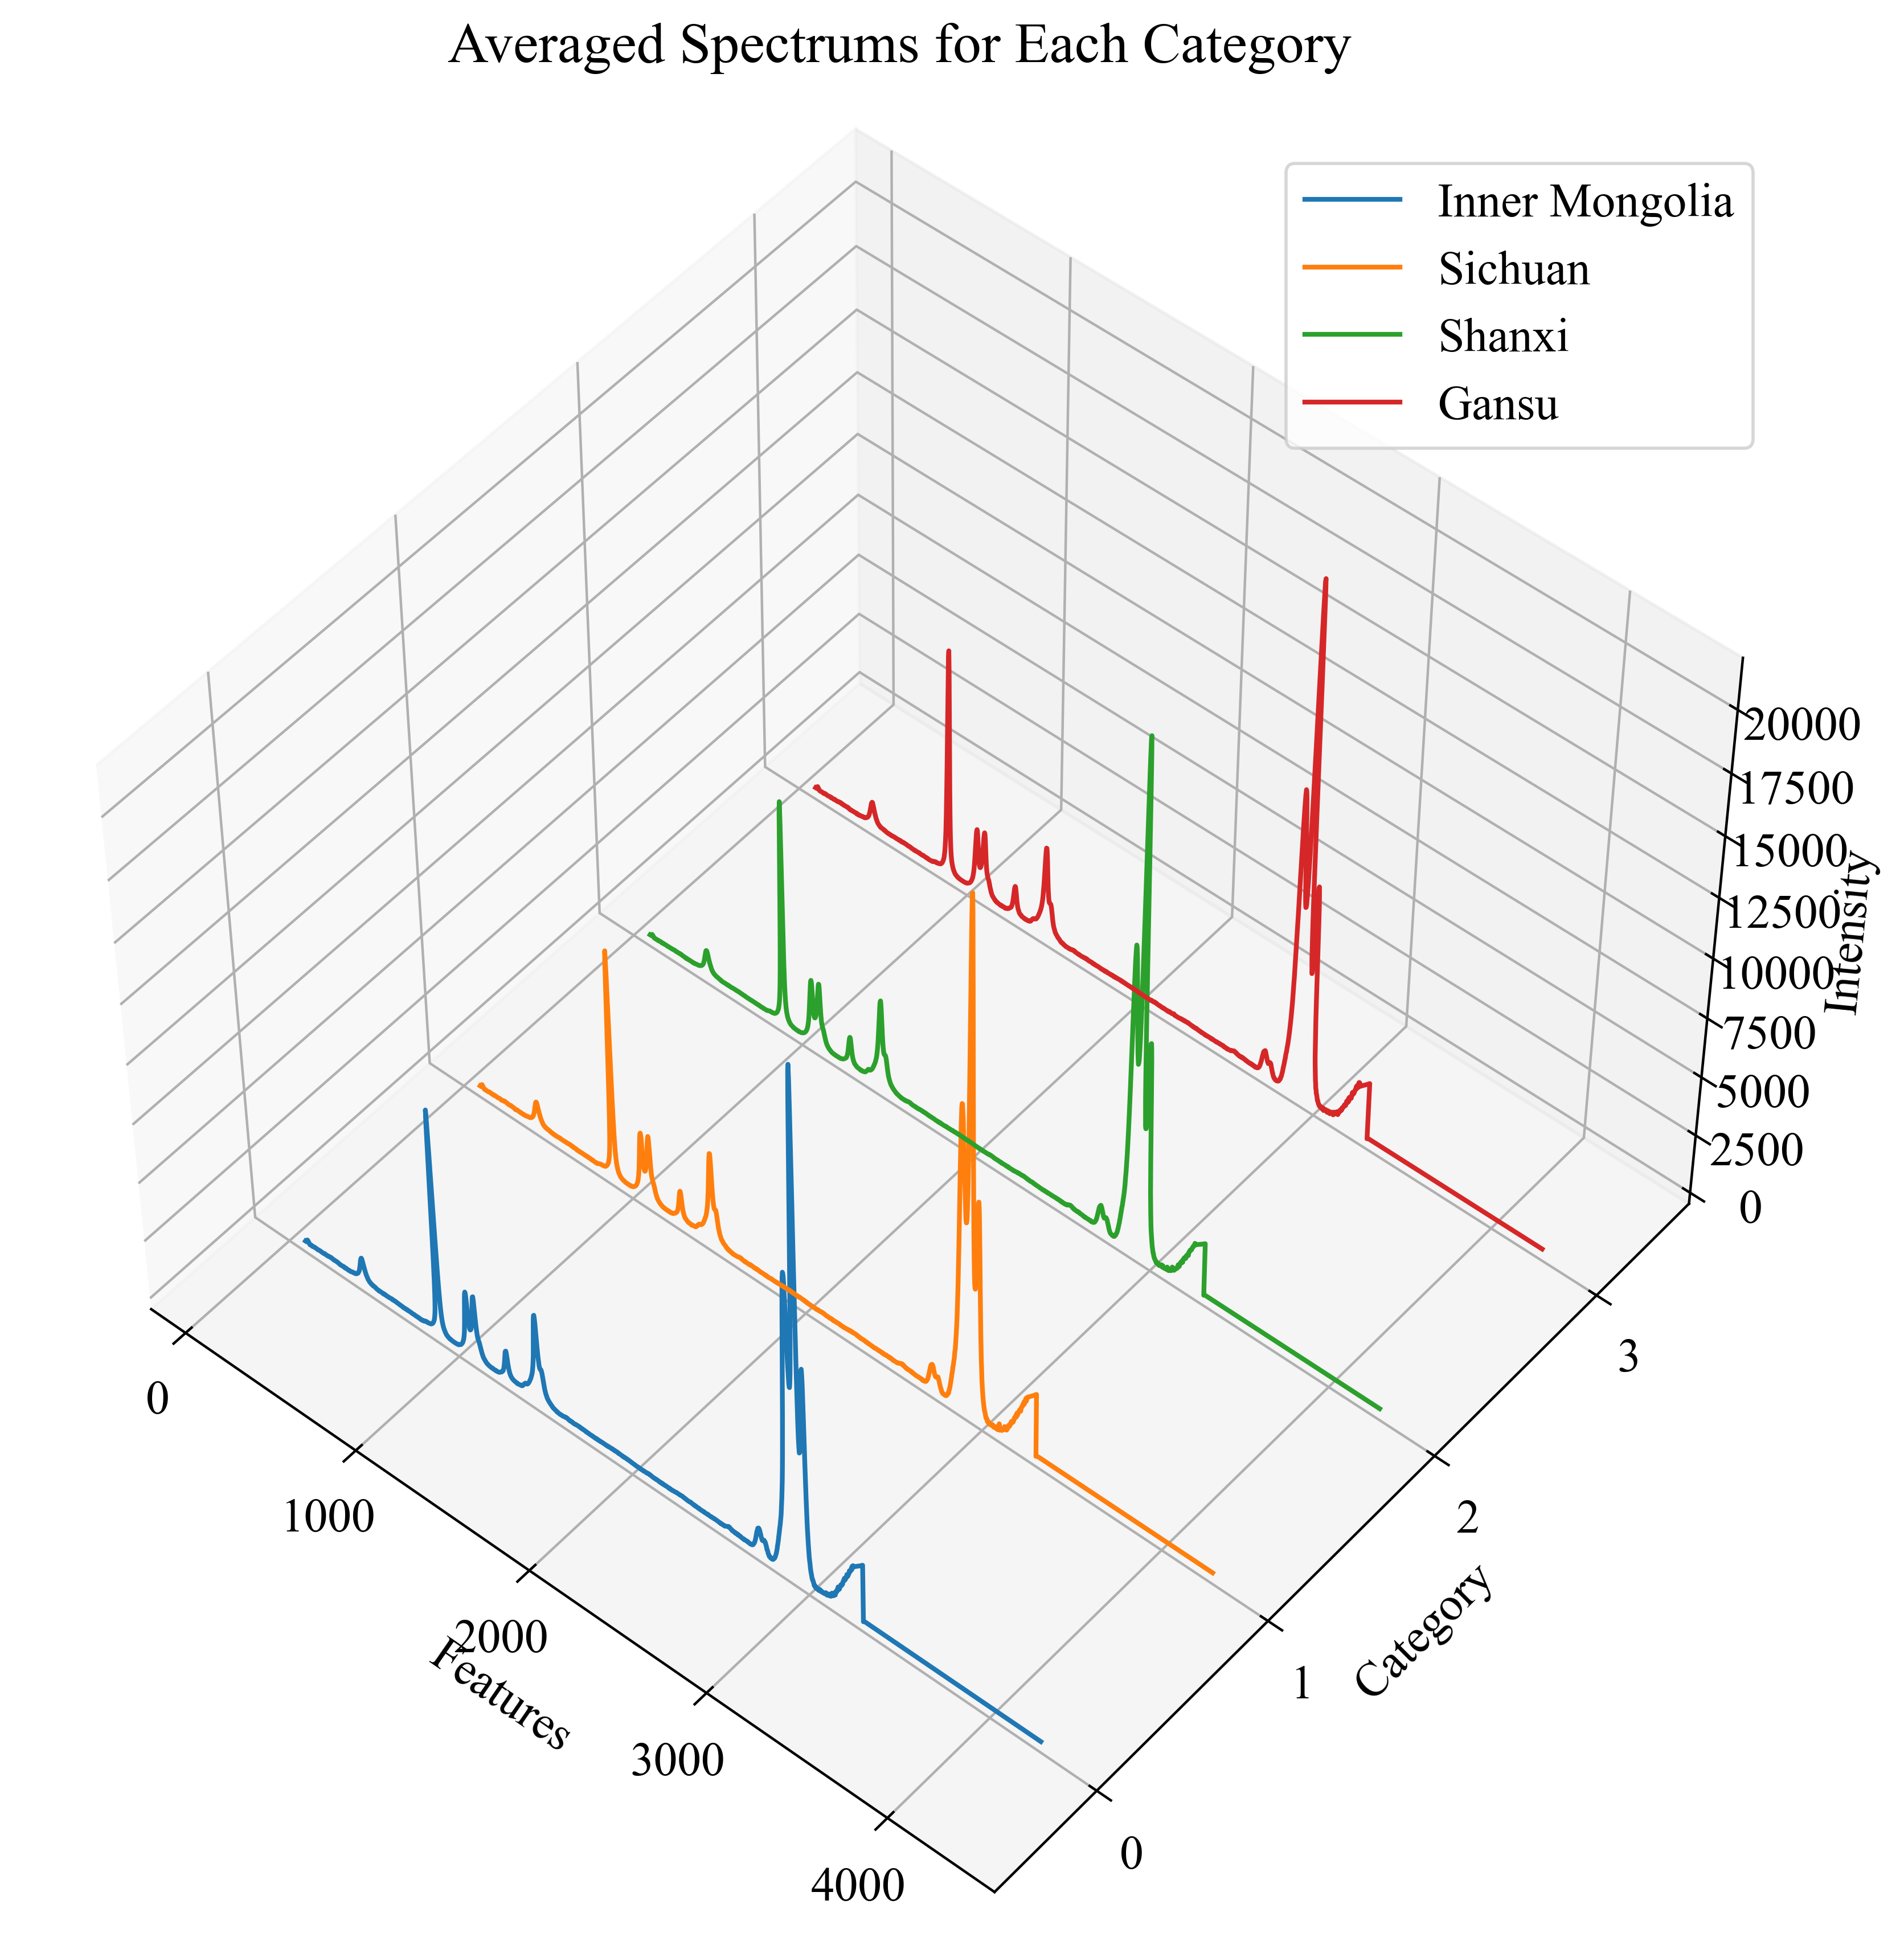

In [3]:
io.draw_class_average_3d(X, y, X_names, labels=labels, view_point = (50,-50))

In [4]:
from qsi.io import pre
X,X_names = pre.x_binning(X, X_names, target_dim = 0.2) # reduce dim to fit in GRAM

# qsi.io.aug

## SMOTE

/source/31.SMOTE/

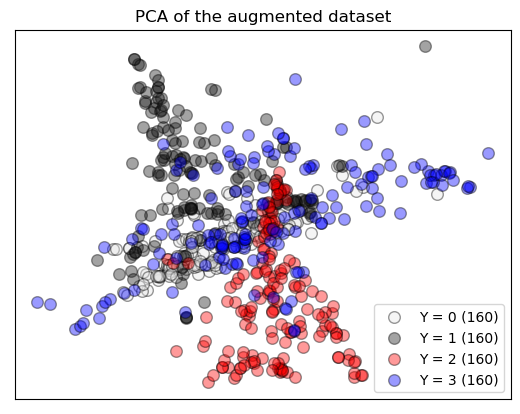

In [5]:
from qsi.io import aug
Xn, yn = aug.upsample('smote.csv', X, y, X_names, method = 'SMOTE', folds = 3, d = 0.5, display = True, verbose = True)

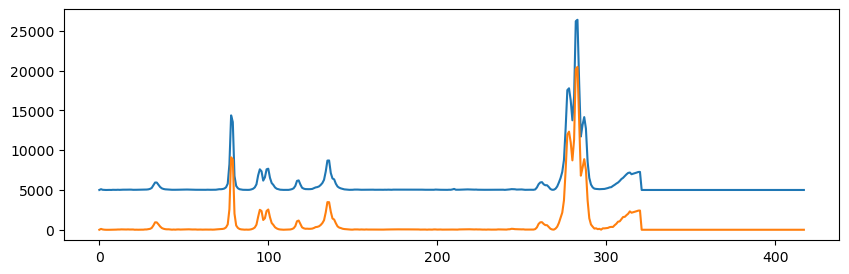

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,3))
plt.plot(Xn[-1] + 5000)
plt.plot(Xn[0])

## ctGAN

/source/32.GAN/

--- ctgan trained for y = 0---
{'_embedding_dim': 128, '_generator_dim': (128, 128), '_discriminator_dim': (128, 128), '_generator_lr': 0.0002, '_generator_decay': 1e-06, '_discriminator_lr': 0.0002, '_discriminator_decay': 1e-06, '_batch_size': 10, '_discriminator_steps': 1, '_log_frequency': True, '_verbose': False, '_epochs': 10, 'pac': 10, '_device': device(type='cuda'), '_transformer': <ctgan.data_transformer.DataTransformer object at 0x0000016ABD2DAE50>, '_data_sampler': <ctgan.data_sampler.DataSampler object at 0x0000016ABD312D60>, '_generator': Generator(
  (seq): Sequential(
    (0): Residual(
      (fc): Linear(in_features=13026, out_features=128, bias=True)
      (bn): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (1): Residual(
      (fc): Linear(in_features=13154, out_features=128, bias=True)
      (bn): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
   

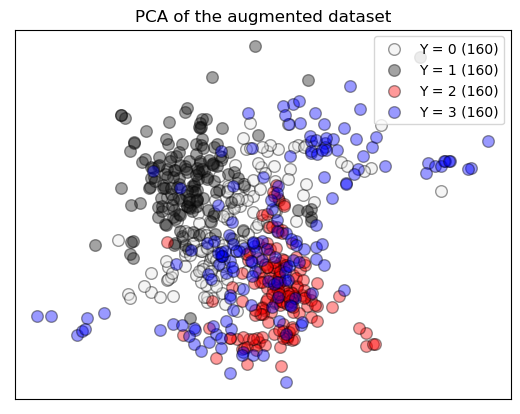

In [7]:
Xn, yn = aug.upsample('ctgan.csv', X, y, X_names, method = 'ctGAN', folds = 3, 
epochs = 10, batch_size = 10, cuda = True, display = True, verbose = True)

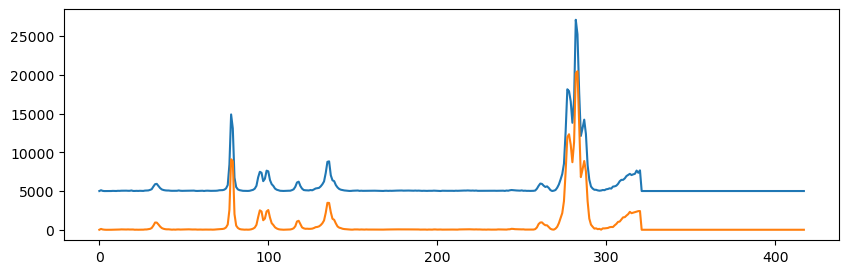

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,3))
plt.plot(Xn[-1] + 5000)
plt.plot(Xn[0])

## KDE

/source/35.KDE

C:\Users\eleve\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [-8.93539160e+07            -inf -2.08694926e+07            -inf
 -4.87530236e+06            -inf -1.14136861e+06            -inf
 -2.71089277e+05            -inf -6.96798571e+04            -inf
 -2.44998188e+04            -inf -1.58106069e+04            -inf
 -1.56444200e+04            -inf -1.74684284e+04            -inf
 -1.97561762e+04            -inf -2.21495769e+04            -inf
 -2.45650844e+04            -inf -2.69882522e+04            -inf
 -2.94160528e+04 -2.09676273e+04 -3.18464202e+04 -2.33979848e+04
 -3.42776554e+04 -2.58295146e+04 -3.67091150e+04 -2.82610445e+04
 -3.91406284e+04 -3.06925744e+04 -4.15721544e+04 -3.31241042e+04]
  warnings.warn(
C:\Users\eleve\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:962: RuntimeWarning: invalid value encountered in subtract
  (array - array_means[:, np.newaxis]) ** 2, axis=1,

best KDE kernel: gaussian, bandwidth: 33.59818286283781


C:\Users\eleve\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [-1.31173188e+08            -inf -3.06373096e+07            -inf
 -7.15679236e+06            -inf -1.67426113e+06            -inf
 -3.95558126e+05            -inf -9.87522945e+04            -inf
 -3.12902429e+04            -inf -1.73965614e+04            -inf
 -1.60149563e+04            -inf -1.75555077e+04            -inf
 -1.97772745e+04            -inf -2.21559756e+04            -inf
 -2.45685855e+04            -inf -2.69891731e+04            -inf
 -2.94162236e+04 -2.09673812e+04 -3.18464572e+04 -2.33979848e+04
 -3.42776639e+04 -2.58295146e+04 -3.67091170e+04 -2.82610445e+04
 -3.91406288e+04 -3.06925744e+04 -4.15721545e+04 -3.31241042e+04]
  warnings.warn(
C:\Users\eleve\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:962: RuntimeWarning: invalid value encountered in subtract
  (array - array_means[:, np.newaxis]) ** 2, axis=1,

best KDE kernel: gaussian, bandwidth: 33.59818286283781


C:\Users\eleve\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [-4.92515453e+07            -inf -1.15026958e+07            -inf
 -2.68747952e+06            -inf -6.30354130e+05            -inf
 -1.51730528e+05            -inf -4.18009779e+04            -inf
 -1.79880594e+04            -inf -1.42893328e+04            -inf
 -1.52884275e+04            -inf -1.73837483e+04            -inf
 -1.97341396e+04            -inf -2.21430637e+04            -inf
 -2.45632537e+04            -inf -2.69870061e+04 -1.85411271e+04
 -2.94155420e+04 -2.09664937e+04 -3.18462818e+04 -2.33979848e+04
 -3.42776219e+04 -2.58295146e+04 -3.67091071e+04 -2.82610445e+04
 -3.91406265e+04 -3.06925744e+04 -4.15721540e+04 -3.31241042e+04]
  warnings.warn(
C:\Users\eleve\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:962: RuntimeWarning: invalid value encountered in subtract
  (array - array_means[:, np.newaxis]) ** 2, axis=1,

best KDE kernel: gaussian, bandwidth: 16.23776739188721


C:\Users\eleve\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [-8.98072276e+07            -inf -2.09753735e+07            -inf
 -4.90003320e+06            -inf -1.14714504e+06            -inf
 -2.72438491e+05            -inf -6.99949960e+04            -inf
 -2.45734177e+04            -inf -1.58276858e+04            -inf
 -1.56481972e+04            -inf -1.74688427e+04            -inf
 -1.97551999e+04            -inf -2.21496964e+04            -inf
 -2.45692588e+04            -inf -2.69926878e+04            -inf
 -2.94181451e+04 -2.09713901e+04 -3.18470345e+04 -2.33981717e+04
 -3.42778072e+04 -2.58295146e+04 -3.67091509e+04 -2.82610445e+04
 -3.91406368e+04 -3.06925744e+04 -4.15721564e+04 -3.31241042e+04]
  warnings.warn(
C:\Users\eleve\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:962: RuntimeWarning: invalid value encountered in subtract
  (array - array_means[:, np.newaxis]) ** 2, axis=1,

best KDE kernel: gaussian, bandwidth: 33.59818286283781


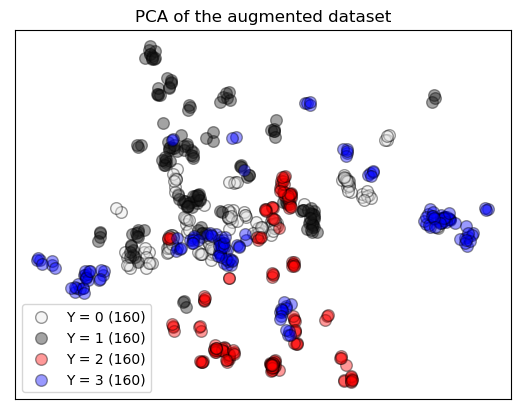

In [9]:
from qsi.io import aug
Xn, yn = aug.upsample('kde.csv', X, y, X_names, method = 'KDE', folds = 3, display = True, verbose = True)

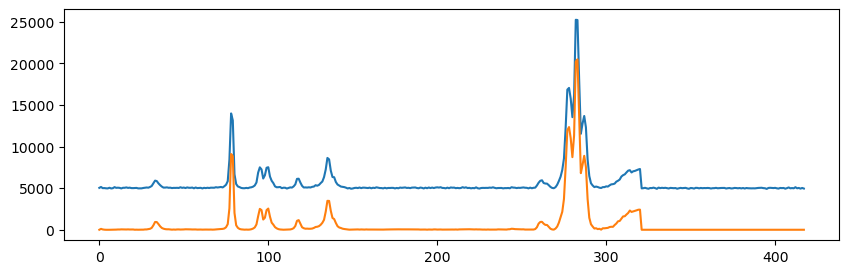

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,3))
plt.plot(Xn[-1] + 5000)
plt.plot(Xn[0])

<hr/>

## TODO: A theoretical comparison with VAE

## AE + KDE vs VAE 

## Comparison between different kernels in KDE